In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
july = pd.read_csv("/content/p_0.csv") #july
nov = pd.read_csv("/content/Power_Position_1_1_0.csv") #Nov
dec = pd.read_csv("/content/Power_Position_1_1-2.csv") #Dec
sep = pd.read_csv("/content/Power_Position_1_1-1.csv") #Sep
june = pd.read_csv("/content/PSP_SELF_june_2023_1.csv") #June
may = pd.read_csv("/content/may_data.csv") #May
march = pd.read_csv("/content/PSP_Mar23_RevIT_1_0.csv") #May
aug = pd.read_csv("/content/August_0.csv") #aug
april = pd.read_csv("/content/April2023PowerSuppyPosition_0.csv") #april
october = pd.read_csv("/content/PowerPosition_0.csv") #october

# adding datasets
df = pd.concat([march,april,may,june,july,aug,sep,october,nov,dec],ignore_index = True)

In [ ]:
df["State "] = df["State "].str.split("/").str.get(1).str.strip()

# Data Cleaning and Feature Engineering

State Column

In [ ]:
df.rename(columns = {"State ": "State"},inplace = True)

In [ ]:
rep = {
    "Andaman- Nicobar #": "Andaman Nicobar",
    "Lakshadweep  #" : "Lakshadweep",
    "Tripura *" : "Tripura"
}
df["State"] = df["State"].replace(rep)

In [ ]:
df["Month"] = df["Month"].str.split("-").str.get(0).str.strip()

In [ ]:
df["State"].shape

(420,)

In [ ]:
df.drop(index  = df[df["State"] == "All India"].index,inplace = True)

In [ ]:
df.drop(index = df[df["State"] == "DVC"].index,inplace = True)

In [ ]:
df.drop(index = df[df["State"].str.contains("Region")].index,inplace = True)

In [ ]:
state_region_dict = {
    "Chandigarh": "North",
    "Sikkim": "Northeast",
    "Puducherry": "South",
    "Lakshadweep": "South",
    "Bihar": "East",
    "Jharkhand": "East",
    "Odisha": "East",
    "West Bengal": "East",
    "Andaman Nicobar": "South",
    "Kerala": "South",
    "Arunachal Pradesh": "Northeast",
    "Assam": "Northeast",
    "Manipur": "Northeast",
    "Meghalaya": "Northeast",
    "Mizoram": "Northeast",
    "Nagaland": "Northeast",
    "Tamil Nadu": "South",
    "Karnataka": "South",
    "Delhi": "North",
    "Uttarakhand": "North",
    "Haryana": "North",
    "Himachal Pradesh": "North",
    "UTs of J&K and Ladakh": "North",
    "Punjab": "North",
    "Rajasthan": "North",
    "Uttar Pradesh": "North",
    "Chhattisgarh": "Central",
    "Telangana": "South",
    "Gujarat": "West",
    "Madhya Pradesh": "Central",
    "Maharashtra": "West",
    "Dadra & Nagar Haveli and Daman & Diu": "West",
    "Goa": "West",
    "Andhra Pradesh": "South",
    "Tripura": "Northeast"
}

In [ ]:
d = df["State"].replace(state_region_dict)
df.insert(0,"Region",d)

In [ ]:
state_ut_dict = {
    "Chandigarh": 1,
    "Sikkim": 0,
    "Puducherry": 1,
    "Lakshadweep": 1,
    "Bihar": 0,
    "Jharkhand": 0,
    "Odisha": 0,
    "West Bengal": 0,
    "Andaman Nicobar": 1,
    "Kerala": 0,
    "Arunachal Pradesh": 0,
    "Assam": 0,
    "Manipur": 0,
    "Meghalaya": 0,
    "Mizoram": 0,
    "Nagaland": 0,
    "Tamil Nadu": 0,
    "Karnataka": 0,
    "Delhi": 1,
    "Uttarakhand": 0,
    "Haryana": 0,
    "Himachal Pradesh": 0,
    "UTs of J&K and Ladakh": 1,
    "Punjab": 0,
    "Rajasthan": 0,
    "Uttar Pradesh": 0,
    "Chhattisgarh": 0,
    "Telangana": 0,
    "Gujarat": 0,
    "Madhya Pradesh": 0,
    "Maharashtra": 0,
    "Dadra & Nagar Haveli and Daman & Diu": 1,
    "Goa": 0,
    "Andhra Pradesh": 0,
    "Tripura": 0
}


In [ ]:
d = df["State"].replace(state_ut_dict).infer_objects(copy=False)
df.insert(2,"is_union_territory",d)

<ipython-input-452-678faa052cdc>:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



Energy columns

In [ ]:
df["Energy_Deficit"] = df["Energy Requirement MU"] - df["Energy Availability MU"]

Month column

In [ ]:
month_quarters = {
    'Mar': 'Q1',
    'Apr': 'Q2',
    'May': 'Q2',
    'Jun': 'Q2',
    'Jul': 'Q3',
    'Aug': 'Q3',
    'Sep': 'Q3',
    'Oct': 'Q4',
    'Nov': 'Q4',
    'Dec': 'Q4'
}

In [ ]:
d = df["Month"].replace(month_quarters)
df.insert(4,"Quarter",d)

# Datatype changes

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 350 entries, 0 to 417
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Region                  350 non-null    object 
 1   State                   350 non-null    object 
 2   is_union_territory      350 non-null    int64  
 3   Month                   350 non-null    object 
 4   Quarter                 350 non-null    object 
 5   Energy Requirement MU   350 non-null    float64
 6   Energy Availability MU  350 non-null    float64
 7   Energy_Deficit          350 non-null    float64
dtypes: float64(3), int64(1), object(4)
memory usage: 24.6+ KB


In [ ]:
df["Region"] = df["Region"].astype("category")
df["Quarter"] = df["Quarter"].astype("category")
df["is_union_territory"] = df["is_union_territory"].astype("category")
df["State"] = df["State"].astype("category")
df["Month"] = df["Month"].astype("category")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 350 entries, 0 to 417
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Region                  350 non-null    category
 1   State                   350 non-null    category
 2   is_union_territory      350 non-null    category
 3   Month                   350 non-null    category
 4   Quarter                 350 non-null    category
 5   Energy Requirement MU   350 non-null    float64 
 6   Energy Availability MU  350 non-null    float64 
 7   Energy_Deficit          350 non-null    float64 
dtypes: category(5), float64(3)
memory usage: 14.9 KB


# EDA

Univariate

In [ ]:
#Energy Requirement MU
df["Energy Requirement MU"].describe()

,Energy Requirement MU
count,350.000000
mean,3795.145090
std,4434.033361
min,5.000000
25%,179.973259
50%,1596.000000
75%,6686.917605
max,18056.000000


In [ ]:
# Data is positively skewed
df["Energy Requirement MU"].skew()

1.2866054499362107

<Axes: xlabel='Energy Requirement MU', ylabel='Count'>

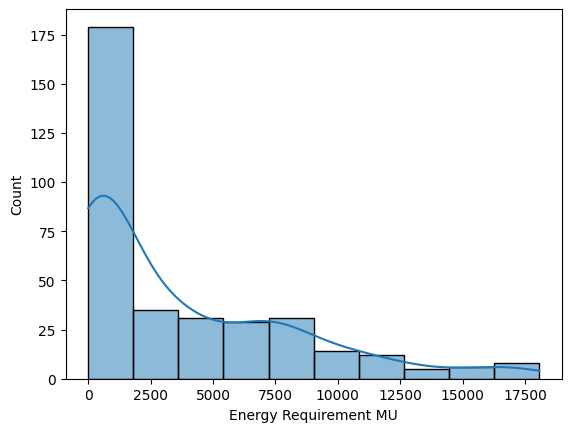

In [ ]:
sns.histplot(data = df,x = "Energy Requirement MU",kde = True)

In [ ]:
px.histogram(df,x = "Energy Requirement MU")

In [ ]:
# There are some outliers but they look genuine
px.box(df,y = "Energy Requirement MU")

In [ ]:
df["Energy Availability MU"].describe()

,Energy Availability MU
count,350.000000
mean,3785.631188
std,4429.376747
min,5.000000
25%,163.500000
50%,1576.500000
75%,6682.000000
max,18051.000000


In [ ]:
# it is also positivley skewed
df["Energy Availability MU"].skew()

1.2879374516095599

In [ ]:
px.histogram(df,x = "Energy Availability MU")

<Axes: xlabel='Energy Availability MU', ylabel='Count'>

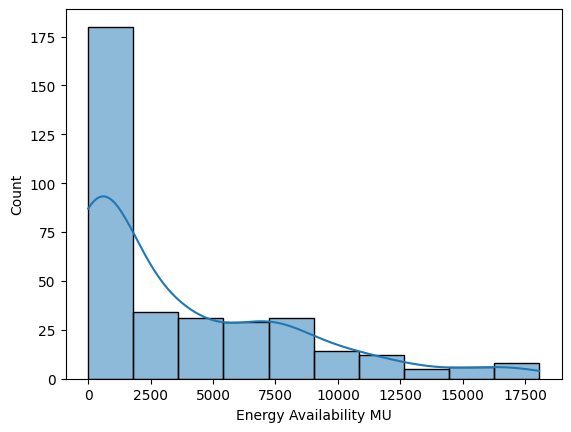

In [ ]:
sns.histplot(data = df,x ="Energy Availability MU",kde = True)

In [ ]:
# There are some outliers but they look genuine
px.box(df,y = "Energy Availability MU")

In [ ]:
df["Energy_Deficit"].describe()

,Energy_Deficit
count,350.000000
mean,9.513902
std,21.834652
min,0.000000
25%,0.000000
50%,0.000000
75%,6.651344
max,195.000000


In [ ]:
# It is highly skewed data
df["Energy_Deficit"].skew()

3.8495496716092736

In [ ]:
px.histogram(df,x = "Energy_Deficit")

<Axes: xlabel='Energy_Deficit', ylabel='Count'>

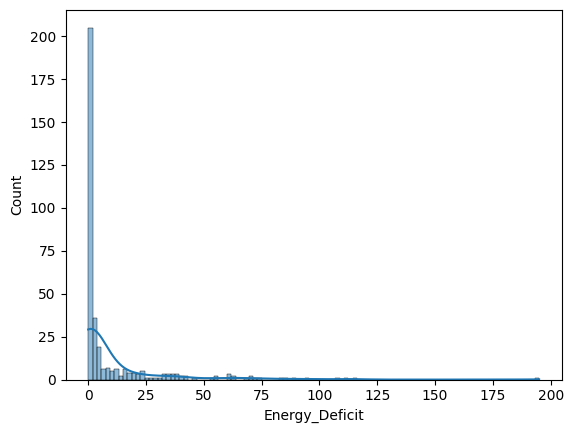

In [ ]:
sns.histplot(data = df,x = "Energy_Deficit",kde = True)

<Axes: xlabel='Energy_Deficit', ylabel='Density'>

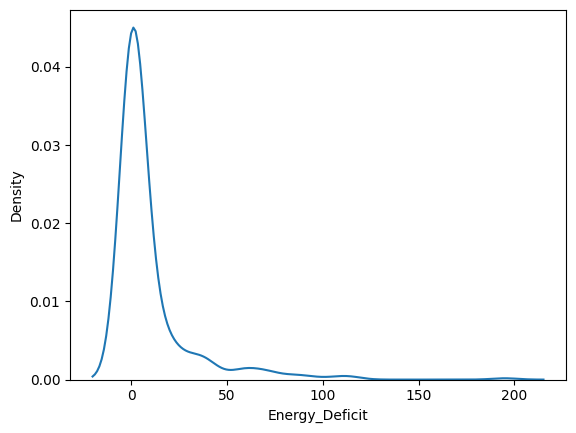

In [ ]:
sns.kdeplot(data = df,x = "Energy_Deficit")

In [ ]:
# There are some outliers
px.box(df,y = "Energy_Deficit")

Bivariate analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 350 entries, 0 to 417
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Region                  350 non-null    category
 1   State                   350 non-null    category
 2   is_union_territory      350 non-null    category
 3   Month                   350 non-null    category
 4   Quarter                 350 non-null    category
 5   Energy Requirement MU   350 non-null    float64 
 6   Energy Availability MU  350 non-null    float64 
 7   Energy_Deficit          350 non-null    float64 
dtypes: category(5), float64(3)
memory usage: 14.9 KB


In [ ]:
px.histogram(df,y= df["Energy_Deficit"],x = df["State"],color = "Region",histfunc = "avg",text_auto=True,title= "Average Energy Deficit of Indian State")

In [ ]:
px.histogram(df,y= df["Energy_Deficit"],x = df["Region"],color = "is_union_territory",histfunc = "avg",text_auto=True,title= "Average Energy Deficit of Indian Regions")

In [ ]:
px.histogram(df,y= df["Energy_Deficit"],x = "is_union_territory",histfunc = "avg",text_auto=True,title= "Average Energy Deficit of Indian States vs Union Territories ")

In [ ]:
# In UT's JK and Ladakh has the highest energy deficit
pd.set_option('display.max_rows',None)
d = df[df["is_union_territory"] == 1].groupby("State",observed = True)["Energy_Deficit"].mean().reset_index()
px.bar(d,x = "State",y = "Energy_Deficit",title = "Energy deficit per UT's")

In [ ]:
# In Indian States Rajasthan is the one state that has the largest energy deficit
d = df[df["is_union_territory"] == 0].groupby("State",observed = True)["Energy_Deficit"].mean().reset_index()
px.bar(d,x = "State",y = "Energy_Deficit",text_auto=True,title = "Energy deficit per State")

In [ ]:
d = df[df["is_union_territory"] == 0].groupby(["State","Month"],observed = True)["Energy_Deficit"].max().reset_index()
px.bar(d,x = "State",y = "Energy_Deficit",color = "Month",title = "Energy deficit per States(months)")

The largest ever Deficit was recoreded in the month of August in Rajasthan
 - Almost Every state recorded their largest energy deficit in August
 - Bihar was in deficit in every month of the year.

In [ ]:
d = df[df["is_union_territory"] == 1].groupby(["State","Month"],observed = True)["Energy_Deficit"].max().reset_index()
px.bar(d,x = "State",y = "Energy_Deficit",color = "Month",title = "Energy deficit in UT's(month)")

UT JK is the only UT that has faced significant Energy Deficit in all UT's.

In [ ]:
d = df[df["is_union_territory"] == 0].groupby(["Region","Month"],observed = True)["Energy_Deficit"].max().reset_index()
px.bar(d,x = "Region",y = "Energy_Deficit",color = "Month",title = "Energy deficit per Region")

East and North region states are mostly Energy Deficit states

In [ ]:
px.strip(df, x="Quarter", y="Energy_Deficit",color = "Region",title = "Energy deficit per Quarter")

Most of the Energy Defict occur in Quater 3
 - The country received above-normal rainfall in August, which led to a  
  decrease in power consumption. This was due to the lower use of cooling appliances like air conditioners.
 - Coal and renewable energy output fell in August, contributing to the  
  decrease in power generation.
 - In Q2, the East region had more energy deficit and in Q3, the North region had more energy deficit.


In [ ]:
df["State"].astype("str").unique()

array(['Chandigarh', 'Delhi', 'Haryana', 'Himachal Pradesh',
       'UTs of J&K and Ladakh', 'Punjab', 'Rajasthan', 'Uttar Pradesh',
       'Uttarakhand', 'Chhattisgarh', 'Gujarat', 'Madhya Pradesh',
       'Maharashtra', 'Dadra & Nagar Haveli and Daman & Diu', 'Goa',
       'Andhra Pradesh', 'Telangana', 'Karnataka', 'Kerala', 'Tamil Nadu',
       'Puducherry', 'Lakshadweep', 'Bihar', 'Jharkhand', 'Odisha',
       'West Bengal', 'Sikkim', 'Andaman Nicobar', 'Arunachal Pradesh',
       'Assam', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Tripura'],
      dtype=object)

In [ ]:
hilly_states_or_uts = [
    'Himachal Pradesh',
    'UTs of J&K and Ladakh',
    'Uttarakhand',
    'Sikkim',
    'Arunachal Pradesh',
    'Manipur',
    'Meghalaya',
    'Mizoram',
    'Nagaland',
    'Tripura'
]

In [ ]:
d = df[df["State"].isin(hilly_states_or_uts)]
px.box(d, x="State", y="Energy_Deficit",color = "is_union_territory", title="Hilly States")

In hilly states, JK and Ladakh is the most energy deficit.
Next is Meghalaya, but the averge is lower then JK.

In [ ]:
temp = df.groupby("State",observed = False)['Energy Availability MU'].mean().sort_values(ascending = False).head(10).reset_index()
px.pie(temp,values = "Energy Availability MU",names = "State")

Most of the Energy Availability and Energy Requirement is in Maharastra and Uttarpradesh
- Maharastra has the highest GPD of any state
- UP is the most populated state in India


In [ ]:
temp = df.groupby("State",observed = False)['Energy Requirement MU'].mean().sort_values(ascending = False).head(10).reset_index()
px.pie(temp,values = "Energy Requirement MU",names = "State")

<Axes: >

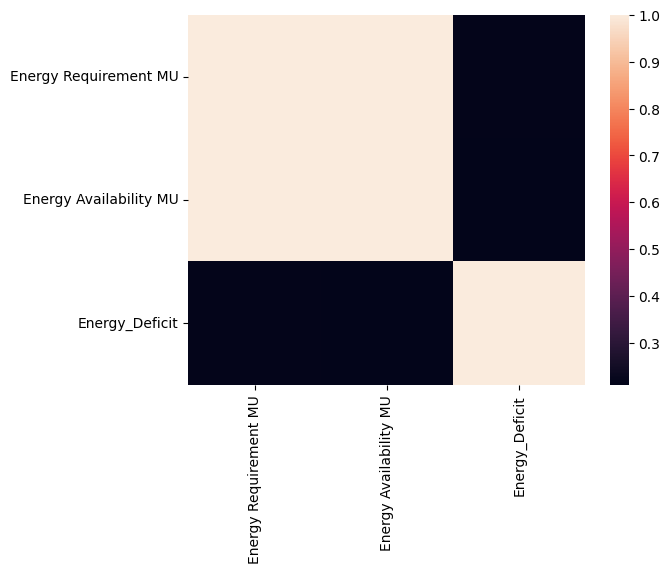

In [ ]:
sns.heatmap(df.corr(numeric_only = True))

In [ ]:
df.to_csv("Energy_deficit.csv",index = False)